# 实现中文文档批量读取、分词、TD-IDF权重、贝叶斯文本分类

### 朴素贝叶斯是常用于自然语言处理 NLP 的工具 

- *高斯朴素贝叶斯*：特征变量是连续变量，符合高斯分布，比如说人的身高，物体的长度。
- *多项式朴素贝叶斯*：特征变量是离散变量，符合多项分布，在文档分类中**特征变量体现在一个单词出现的次数，或者是单词的 TF-IDF 值**等。
- *伯努利朴素贝叶斯*：**特征变量是布尔变量，符合 0/1 分布**，在文档分类中特征是单词是否出现。

- 伯努利朴素贝叶斯是以文件为粒度，如果该单词在某文件中出现了即为 1，否则为 0。
- 而多项式朴素贝叶斯是以单词为粒度，会计算在某个文件中的具体次数
-  如身高、体重这种自然界的现象就比较适合用高斯朴素贝叶斯来处理。
- 而文本分类是使用多项式朴素贝叶斯或者伯努利朴素贝叶斯

In [1]:
import os
import jieba
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

C:\Users\123\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
warnings.filterwarnings('ignore')

In [3]:
def cut_words(file_path):
    """
    对文本进行切词
    :param file_path: txt文本路径
    :return: 用空格分词的字符串
    """
    text_with_spaces = ''
    text=open(file_path, 'r', encoding='gb18030').read()
    textcut = jieba.cut(text)
    for word in textcut:
        text_with_spaces += word + ' '
    return text_with_spaces

In [4]:
def loadfile(file_dir, label):
    """
    将路径下的所有文件加载
    :param file_dir: 保存txt文件目录
    :param label: 文档标签
    :return: 分词后的文档列表和标签
    """
    file_list = os.listdir(file_dir)
    words_list = []
    labels_list = []
    for file in file_list:
        file_path = file_dir + '/' + file
        words_list.append(cut_words(file_path))
        labels_list.append(label)                                                                                                                 
    return words_list, labels_list

In [5]:
# 训练数据
train_words_list1, train_labels1 = loadfile('C:/Users/123/Desktop/text classification/train/女性', '女性')
train_words_list2, train_labels2 = loadfile('C:/Users/123/Desktop/text classification/train/体育', '体育')
train_words_list3, train_labels3 = loadfile('C:/Users/123/Desktop/text classification/train/文学', '文学')
train_words_list4, train_labels4 = loadfile('C:/Users/123/Desktop/text classification/train/校园', '校园')

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\123\AppData\Local\Temp\jieba.cache
Loading model cost 1.887 seconds.
Prefix dict has been built succesfully.


In [6]:
train_words_list = train_words_list1 + train_words_list2 + train_words_list3 + train_words_list4
train_labels = train_labels1 + train_labels2 + train_labels3 + train_labels4

In [7]:
# 测试数据
test_words_list1, test_labels1 = loadfile('C:/Users/123/Desktop/text classification/test/女性', '女性')
test_words_list2, test_labels2 = loadfile('C:/Users/123/Desktop/text classification/test/体育', '体育')
test_words_list3, test_labels3 = loadfile('C:/Users/123/Desktop/text classification/test/文学', '文学')
test_words_list4, test_labels4 = loadfile('C:/Users/123/Desktop/text classification/test/校园', '校园')

In [8]:
test_words_list = test_words_list1 + test_words_list2 + test_words_list3 + test_words_list4
test_labels = test_labels1 + test_labels2 + test_labels3 + test_labels4

In [9]:
# 停用词
stop_words = open('C:/Users/123/Desktop/text classification/stop/stopword.txt', 'r', encoding='utf-8').read()
stop_words = stop_words.encode('utf-8').decode('utf-8-sig') # 列表头部\ufeff处理
stop_words = stop_words.split('\n') # 根据分隔符分隔

In [10]:
# 计算单词权重
tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5)  #注意数据结构：stop_words是list，过滤词token_parten是正则表达式

## TF-IDF 值
- TF-IDF 是一个统计方法，用来评估某个词语对于一个文件集或文档库中的其中一份文件的重要程度（越大越重要）
#####  TF-IDF 实际上是词频 TF 和逆向文档频率 IDF 的乘积。这样我们倾向于找到 TF 和 IDF 取值都高的单词作为区分，即这个单词在一个文档中出现的次数多，同时又很少出现在其他文档中。这样的单词适合用于分类。

- **词频 TF**计算了一个单词在文档中出现的次数，它认为一个单词的重要性和它在文档中出现的次数呈正比
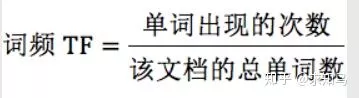

- **逆向文档频率 IDF**，是指一个单词在文档中的**区分度**。它认为一个单词出现在的文档数越少，就越能通过这个单词把该文档和其他文档区分开。**IDF 越大就代表该单词的区分度越大**。
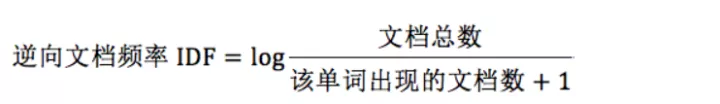

In [12]:
# 拟合模型，返回文本矩阵
train_features = tf.fit_transform(train_words_list)  

In [13]:
# 上面fit过了，这里transform
test_features = tf.transform(test_words_list) 

In [14]:
# 多项式贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB  

clf = MultinomialNB(alpha=0.001).fit(train_features, train_labels)
predicted_labels=clf.predict(test_features)

In [15]:
# 计算准确率
print('准确率为：', metrics.accuracy_score(test_labels, predicted_labels))

准确率为： 0.91


In [16]:
print (metrics.accuracy_score(test_labels, predicted_labels))

0.91
